In [8]:
import instatools
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# this takes the account with given username, grabs all posts and dumps to a local json file with name based on that username

username = 'drought_season'

my_user = instatools.Instauser()
my_user.get_user_from_web(username)

all_data_list = my_user.get_all_data_list(username)

print(json.dumps(all_data_list))
outfilename = username + '_all_data_list.json'
thisoutfile = open(outfilename, 'w')
thisoutfile.write(json.dumps(all_data_list))


[{"id": "3226711963235876342", "shortcode": "CzHlW9JLX32", "width": 1080, "height": 1080, "display_url": "https://scontent-iad3-2.cdninstagram.com/v/t51.2885-15/398835478_272057922499433_4651882811371179233_n.heic?stp=dst-jpg_e35_s1080x1080&_nc_ht=scontent-iad3-2.cdninstagram.com&_nc_cat=105&_nc_ohc=4VYrHFG9We8AX_icfej&edm=AOQ1c0wBAAAA&ccb=7-5&oh=00_AfDP64tcX1wKO_2yFbAMXuVfU4eHCVgiS2F2pyXh2ca9zw&oe=656D04F7&_nc_sid=8b3546", "tagged_user_list": {"edges": []}, "fact_check_overall_rating": null, "fact_check_information": null, "gating_info": null, "sharing_friction_info": {"should_have_sharing_friction": false, "bloks_app_url": null}, "media_overlay_info": null, "media_preview": "ACoqxw23p0pS36V0H9nRf3aP7Oi/u1XIyedeZz+4mmk5ro/7Nh/u0yKxtpRlBkA4/wA5FHKPnOeUZOAOfarH2f1YfrWytjGs2wDjbk/5FWhYQgY2A49c0uUOYqCeX3qRbh+5zVQOQeP61NvwBjv19/zJ/LpUcz7hYne88tSxPTtxkn0rNjvZIHKqMhiCR15Pp6D061K6fIxwCcHHAqDejTqy8gAfmAapS5tewWsaKXW9vMXnIx0qX7VJ6j8hVRQA5boCBn0+v1H61Z8mQ9ACPXIpOXVIdimhORmkdD2x6io4WJYc96mY8Ck4W2

620929

In [11]:
# this data is available here for further exploration if desired, e.g. below lists all display urls for all posts

all_caption_list = []
for thispost in all_data_list:
  accessibility_caption = thispost.get('accessibility_caption','')
  #if accessibility_caption:
  #  print(accessibility_caption)
  caption = thispost.get('caption',{})
  if caption:
    caption_node = caption.get('node',{})
    if caption_node:
      caption_node_text = caption_node.get('text',{})
      if caption_node_text:
        all_caption_list.append(caption_node_text)

#print(all_caption_list)

for thiscaption in all_caption_list:
  if thiscaption:
    print(thiscaption)

allstring = ' '.join(all_caption_list)

tokens = allstring.split()

for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()

caption_words = ""
caption_words += " ".join(tokens)+" "

stopwords = set(STOPWORDS)



𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
𝘠𝘰𝘶 𝘥𝘰𝘯'𝘵 𝘯𝘦𝘦𝘥 𝘵𝘰 𝘭𝘦𝘢𝘷𝘦 𝘵𝘩𝘦 𝘱𝘰𝘳𝘤𝘩 𝘭𝘪𝘨𝘩𝘵 𝘰𝘯
𝘐'𝘮 𝘢𝘭𝘳𝘦𝘢𝘥𝘺 𝘩𝘢𝘭𝘧𝘸𝘢𝘺 𝘨𝘰𝘯𝘦
I’m living down in The Wells these days. It’s not bad. It’s cooler, at least. If you ever want to talk, just let me know.

- A pilgrim to his better half
I’m living down in The Wells these days. It’s not bad. It’s cooler, at least. If you ever want to talk, just let me know.

- A pilgrim to his better half
I’m living down in The Wells these days. It’s not bad. It’s cooler, at least. If you ever want to talk, just let me know.

- A pilgrim to his better half
I’m living down in The Wells these days. It’s not bad. It’s co

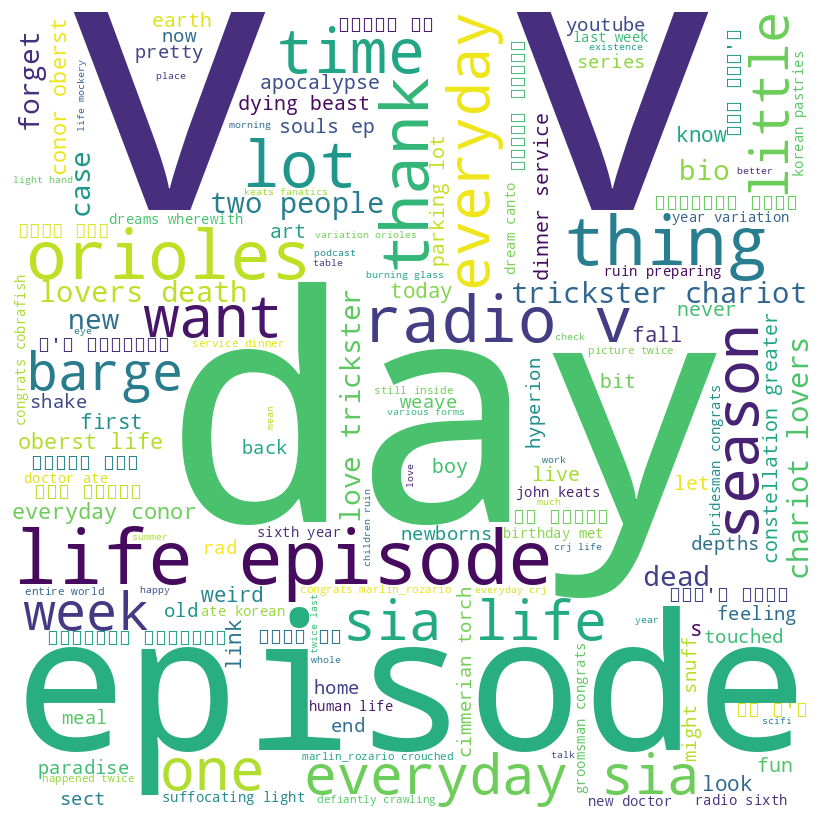

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(caption_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)